In [24]:
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans,SpectralClustering,DBSCAN,AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import calmap
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [38]:
p = "pickles/alliance_sub.p"

In [39]:
df_merged = pd.read_pickle(p)

In [4]:
df_merged.head()

,Unnamed: 0,d,t,date_x,no2,o3,no,so2,temp,humidity,...,date_y,nsec,altm_(hpa),temp (degree_c),dew (degree_c),rh_(percentage),dir_(degrees),spd_(m/s),vis (km),clouds (====)
0,13770,06/05/2016,22:00:25,2016-05-07 00:00:00,2,-2,-13,-33,19.20,84.45,...,2016-05-06 22:00:00,3671550000,1023.0,19,18,94,320,3,10.0,FEW018
1,13800,06/05/2016,22:30:25,2016-05-07 00:30:00,0,0,-14,-33,18.95,83.96,...,2016-05-06 22:30:00,3671551800,1023.0,19,17,88,350,2,10.0,FEW018
2,13830,06/05/2016,23:00:25,2016-05-07 01:00:00,1,-1,-15,-33,19.05,85.03,...,2016-05-06 23:00:00,3671553600,1023.0,18,17,94,30,3,10.0,FEW018
3,13860,06/05/2016,23:30:25,2016-05-07 01:30:00,3,-3,-15,-34,18.84,86.40,...,2016-05-06 23:30:00,3671555400,1024.0,18,17,94,10,3,10.0,FEW018
4,13916,07/05/2016,00:30:13,2016-05-07 02:30:00,0,0,-14,-32,18.22,85.67,...,2016-05-07 00:30:00,3671559000,1024.0,18,17,94,20,2,10.0,FEW018


In [40]:
features = ['no2','o3','no','so2','temp', 'humidity', 'd0', 'd1', 'd2', 'd3', 'd4','d5', 'd6', 'd7',\
            'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15']

In [41]:
points = ['dir_(degrees)', 'spd_(m/s)']

In [42]:
X = df_merged[features].as_matrix()
Y = df_merged[points]

In [43]:
# pca = PCA(n_components=4)
# reduced_data_k = pca.fit_transform(X)

pca = KernelPCA(n_components=2, kernel='rbf')
reduced_data_k = pca.fit_transform(X)

In [56]:
n_clusters = 4

#kmeans = KMeans(init='random', n_clusters=n_clusters, n_init=10)
#labels = kmeans.fit_predict(reduced_data_k)

# agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
# labels = agglomerative.fit_predict(X)

gaussian = GaussianMixture(n_components=n_clusters)
gaussian.fit(X)
labels = gaussian.predict(X)

In [57]:
labels = pd.DataFrame({"labels": labels})
Y_joined = np.array(Y.join(labels))

In [58]:
Y_joined

array([[320,   3,   3],
       [350,   2,   3],
       [ 30,   3,   3],
       ..., 
       [ 40,   6,   3],
       [ 60,   6,   3],
       [ 50,   7,   2]])

In [59]:
colors = ['r','b','g','c']
c_assign = [colors[x[2]] for x in Y_joined]

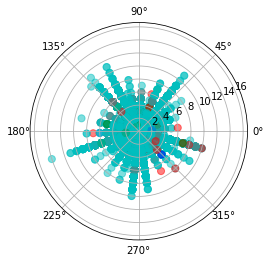

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(Y_joined[:,0], Y_joined[:,1], c=c_assign, edgecolors='face', s=50, cmap='hsv', alpha=.5)
plt.show()

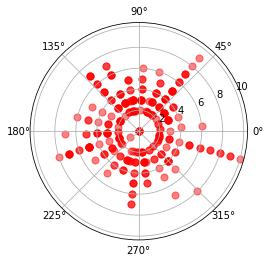

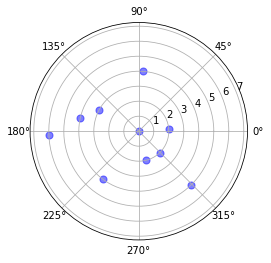

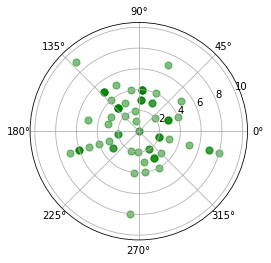

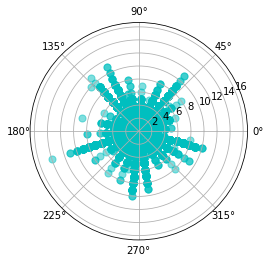

In [61]:
for i in range(n_clusters):
    val = Y_joined[Y_joined[:,2]==i]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='polar')
    c = ax.scatter(val[:,0], val[:,1], color=colors[i], edgecolors='face', s=50, cmap='hsv', alpha=.5)
plt.show()

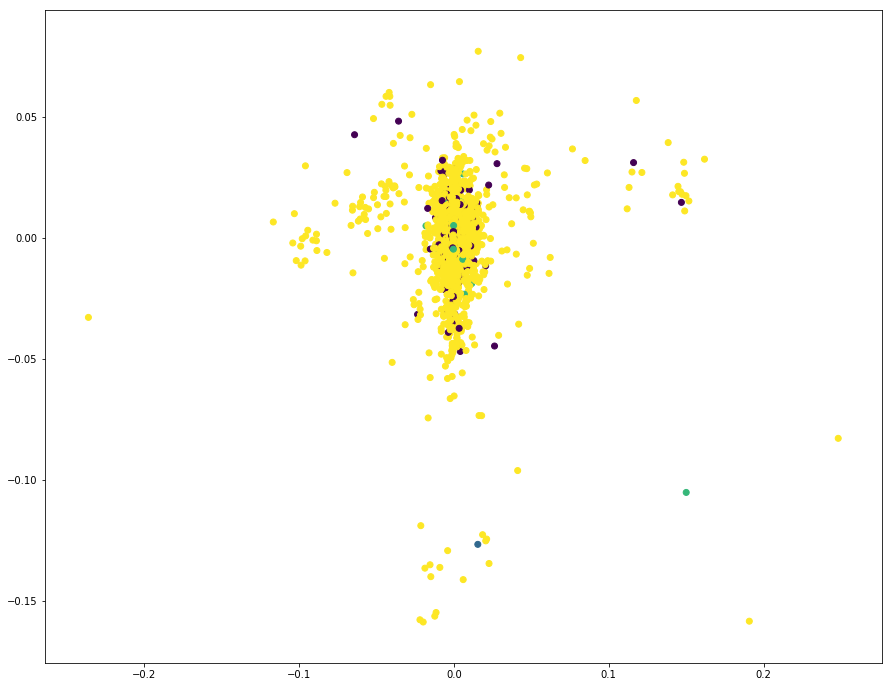

In [62]:
plt.figure(3,figsize=(15,12))
plt.scatter(reduced_data_k[:,0], reduced_data_k[:,1], c=labels)
plt.show()

In [63]:
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data_k[:, 0].min() - 1, reduced_data_k[:, 0].max() + 1


In [65]:
y_min, y_max = reduced_data_k[:, 1].min() - 1, reduced_data_k[:, 1].max() + 1

In [66]:

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.03     # point in the mesh [x_min, x_max]x[y_min, y_max].
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [67]:
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])


NotFittedError: This KMeans instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [64]:

Z = Z.reshape(xx.shape)
plt.figure(1,figsize=(12,8))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data_k[:, 0], reduced_data_k[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the rbf-kernel PCA-reduced Alliance dataset')
plt.xlim(-0.4, 0.6)
plt.ylim(-0.5, 0.5)
#plt.xticks(())
#plt.yticks(())
plt.show()

NameError: name 'Z' is not defined

In [32]:
kernel_fits = []
cluster_settings = range(2, 11)
num_trails = 10
data = X

for setting in cluster_settings:
    total_score = 0
    for _ in range(num_trails):
        kmeans = KMeans(init='random', n_clusters=setting, n_init=10)
        labels = kmeans.fit_predict(data)
        total_score += metrics.calinski_harabaz_score(data, labels)
    kernel_fits.append((setting, total_score / num_trails))
    
for (setting, score) in kernel_fits:
    print ("Average score for {} clusters: {}".format(setting, score))

KeyboardInterrupt: 

In [53]:
db = DBSCAN(eps=0.02, min_samples=10).fit(reduced_data_k)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


In [55]:
n_clusters_

2

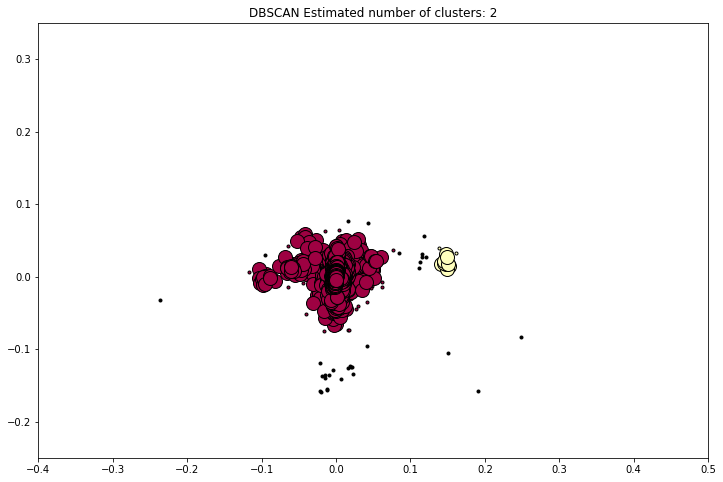

In [54]:
# Black removed and is used for noise instead.
plt.figure(1,figsize=(12,8))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    
    xy = reduced_data_k[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=3)

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    

    xy = reduced_data_k[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)


plt.xlim(-0.4, 0.5)
plt.ylim(-0.25, 0.35)
plt.title('DBSCAN Estimated number of clusters: %d' % n_clusters_)
plt.show()